In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime
from dateutil.parser import parse

In [ ]:
!python --version

Python 3.7.12


## Load and Prepare Data

In [ ]:
googel_data=pd.read_csv('/content/drive/MyDrive/googleplaystore.csv')

In [ ]:
googel_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## EDA

In [ ]:
googel_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
googel_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
googel_data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
805,Learn to Speak English,EDUCATION,4.400000,33646,7.0M,1000000.0,Free,0.0,Everyone,Education,2018-07-15,2.3.9,4.0 and up
4734,Open in WhatsApp (click to chat),TOOLS,4.200000,12121,79k,1000000.0,Free,0.0,Everyone,Tools,2018-08-01,1.12,2.3.3 and up
111,Colors of white in Urdu,BEAUTY,4.500000,36,6.7M,10000.0,Free,0.0,Everyone,Beauty,2018-07-26,6.0,4.0 and up
5375,I Am Wizard,FAMILY,4.200000,1493,57M,100000.0,Free,0.0,Everyone,Strategy,2018-04-01,1.0.9,4.1 and up
1258,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.900000,38098,11M,5000000.0,Free,0.0,Everyone,Health & Fitness,2018-06-21,1.0.4,4.2 and up
1011,"SeatGeek – Tickets to Sports, Concerts, Broadway",EVENTS,4.400000,15558,26M,1000000.0,Free,0.0,Everyone,Events,2018-08-03,2018.07.31229,5.0 and up
7031,Voxel - 3D Color by Number & Pixel Coloring Book,GAME,4.700000,62561,53M,1000000.0,Free,0.0,Everyone,Board,2018-07-31,2.4.11,4.1 and up
496,Black People Meet Singles Date,DATING,3.900000,10212,5.0M,1000000.0,Free,0.0,Mature 17+,Dating,2018-07-25,1.9.7,4.4 and up
4010,Bridge-C - Get More Storage,TOOLS,2.000000,24,35M,1000.0,Free,0.0,Everyone,Tools,2017-12-29,1.7,6.0 and up
10425,FH CODE,TOOLS,4.193338,13,3.6M,100.0,Free,0.0,Everyone,Tools,2018-02-26,FH CODE 1.0,2.1 and up


In [ ]:
googel_data.shape

(10841, 13)

In [ ]:
googel_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
googel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
googel_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
googel_data[['App','Installs']][:5]

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,"10,000+"
1,Coloring book moana,"500,000+"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...","5,000,000+"
3,Sketch - Draw & Paint,"50,000,000+"
4,Pixel Draw - Number Art Coloring Book,"100,000+"


In [ ]:
googel_data[['App','Rating','Installs']][:5]

,App,Rating,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,"10,000+"
1,Coloring book moana,3.9,"500,000+"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,"5,000,000+"
3,Sketch - Draw & Paint,4.5,"50,000,000+"
4,Pixel Draw - Number Art Coloring Book,4.3,"100,000+"


In [ ]:
googel_data[['App','Rating','Reviews','Installs','Price','Type']][:5]

,App,Rating,Reviews,Installs,Price,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,"10,000+",0,Free
1,Coloring book moana,3.9,967,"500,000+",0,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,"5,000,000+",0,Free
3,Sketch - Draw & Paint,4.5,215644,"50,000,000+",0,Free
4,Pixel Draw - Number Art Coloring Book,4.3,967,"100,000+",0,Free


In [ ]:
googel_data[['App','Rating','Reviews','Installs','Price','Android Ver','Type']][-5:]

,App,Rating,Reviews,Installs,Price,Android Ver,Type
10836,Sya9a Maroc - FR,4.5,38,"5,000+",0,4.1 and up,Free
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,100+,0,4.1 and up,Free
10838,Parkinson Exercices FR,NaN,3,"1,000+",0,2.2 and up,Free
10839,The SCP Foundation DB fr nn5n,4.5,114,"1,000+",0,Varies with device,Free
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,398307,"10,000,000+",0,Varies with device,Free


In [ ]:
googel_data[['App','Rating','Reviews','Installs','Price','Android Ver','Category']].sample(5)

,App,Rating,Reviews,Installs,Price,Android Ver,Category
414,Puffin Web Browser,4.3,541389,"10,000,000+",0,4.1 and up,COMMUNICATION
7319,CG Backgrounds,4.0,8,500+,0,4.0.3 and up,FAMILY
4890,Angry Birds Star Wars,4.3,1218055,"100,000,000+",0,4.1 and up,GAME
3501,Pushbullet - SMS on PC,4.5,176873,"1,000,000+",0,4.1 and up,PRODUCTIVITY
6813,BU Bus Tracker,4.2,57,"10,000+",0,4.1 and up,MAPS_AND_NAVIGATION


In [ ]:
googel_data[googel_data['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
googel_data[googel_data['Last Updated'].str.contains('1.0.19')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
googel_data['Reviews']=googel_data['Reviews'].str.replace('3.0M','3000000')

In [ ]:
googel_data[googel_data['Reviews'].str.contains('3000000')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
googel_data[googel_data['Size'].str.contains('device')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000.0,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000.0,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,100000.0,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,100000.0,Free,0.0,Everyone,Weather,2018-07-24,Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,1000.0,Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000.0,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000.0,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device


In [ ]:
googel_data[googel_data.Size.str.contains('device')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000.0,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000.0,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,100000.0,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,100000.0,Free,0.0,Everyone,Weather,2018-07-24,Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,1000.0,Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000.0,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000.0,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device


**Changing types of some variables for better EDA**

In [ ]:
googel_data['Price']=googel_data['Price'].str.strip()
googel_data['Price']=googel_data['Price'].str.replace('$','')

In [ ]:
def cut(data):
    return data.split('+')[0]
googel_data['Installs']=googel_data['Installs'].apply(lambda x: f'{cut(x)}')
googel_data['Installs']=googel_data['Installs'].str.replace(',','')

In [ ]:
googel_data['Price']=pd.to_numeric(googel_data.Price, errors='coerce')
googel_data['Installs']=pd.to_numeric(googel_data.Installs, errors='coerce')
googel_data['Reviews']=pd.to_numeric(googel_data.Reviews, errors='coerce')

In [ ]:
googel_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
588,Adult Dirty Emojis,DATING,2.8,80,5.5M,10000.0,Free,0.0,Teen,Dating,"November 6, 2017",1.0,4.0.3 and up
9472,Dubai Racing,GAME,4.2,16237,23M,500000.0,Free,0.0,Everyone,Racing,"December 23, 2015",1.9.1,2.3 and up
7160,INTERKINOIS.CD,NEWS_AND_MAGAZINES,NaN,1,1.5M,5.0,Free,0.0,Everyone,News & Magazines,"June 9, 2018",1.0,4.0.3 and up
9046,DX Simulation for Kabuto Henshin Belt 2018,FAMILY,4.6,14,7.2M,5000.0,Free,0.0,Everyone,Simulation,"August 6, 2018",1.5,4.0.3 and up
8059,CX-40,FAMILY,3.0,2,33M,100.0,Free,0.0,Everyone,Entertainment,"December 14, 2017",3.0,4.0 and up


In [ ]:
googel_data.describe()

,Rating,Reviews,Installs,Price
count,9367.000000,1.084100e+04,1.084000e+04,10840.000000
mean,4.193338,4.443887e+05,1.546434e+07,1.027368
std,0.537431,2.927728e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.479800e+04,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1.000000e+09,400.000000


In [ ]:
googel_data.groupby('Category')['Price'].mean()

Category
1.9                         NaN
ART_AND_DESIGN         0.091846
AUTO_AND_VEHICLES      0.158471
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.518485
BUSINESS               0.402761
COMICS                 0.000000
COMMUNICATION          0.214832
DATING                 0.134316
EDUCATION              0.115128
ENTERTAINMENT          0.053557
EVENTS                 1.718594
FAMILY                 1.234675
FINANCE                7.925765
FOOD_AND_DRINK         0.066772
GAME                   0.251136
HEALTH_AND_FITNESS     0.197478
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.011647
LIFESTYLE              6.180288
MAPS_AND_NAVIGATION    0.196715
MEDICAL                3.110065
NEWS_AND_MAGAZINES     0.014064
PARENTING              0.159667
PERSONALIZATION        0.392755
PHOTOGRAPHY            0.400627
PRODUCTIVITY           0.591816
SHOPPING               0.021077
SOCIAL                 0.054136
SPORTS                 0.260417
TOOLS                  0.317023

In [ ]:
googel_data[googel_data.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
googel_data[googel_data.Price == 400.]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


In [ ]:
googel_data[googel_data.Rating == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
googel_data[googel_data.Installs== 1000000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
386,Hangouts,COMMUNICATION,4.0,3419433,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [ ]:
googel_data[googel_data.Installs== 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0.0,Paid,1.49,Everyone,Personalization,"July 11, 2018",1.1,4.2 and up
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7M,0.0,Paid,13.99,Teen,Social,"July 28, 2017",3.4.4.3.3,4.1 and up
5486,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0.0,Paid,1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0.0,Paid,2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0.0,Paid,154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9M,0.0,Free,0.00,Teen,Social,"July 21, 2018",0.0.1,4.4 and up
8081,CX Network,BUSINESS,NaN,0,10M,0.0,Free,0.00,Everyone,Business,"August 6, 2018",1.3.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0.0,Free,0.00,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0.0,Free,0.00,Everyone,Art & Design,"March 14, 2017",4.0,4.2 and up
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0.0,NaN,0.00,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
googel_data[(googel_data.Installs== 0) & (googel_data.Price !=0 )]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0.0,Paid,1.49,Everyone,Personalization,"July 11, 2018",1.1,4.2 and up
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7M,0.0,Paid,13.99,Teen,Social,"July 28, 2017",3.4.4.3.3,4.1 and up
5486,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0.0,Paid,1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0.0,Paid,2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0.0,Paid,154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56M,0.0,Paid,3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up
9719,EP Cook Book,MEDICAL,NaN,0,3.2M,0.0,Paid,200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up
9905,Eu sou Rico,FINANCE,NaN,0,2.6M,0.0,Paid,30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up
9917,Eu Sou Rico,FINANCE,NaN,0,1.4M,0.0,Paid,394.99,Everyone,Finance,"July 11, 2018",1.0,4.0.3 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40M,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up


In [ ]:
googel_data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
googel_data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
googel_data.Type.value_counts(normalize=True)*100

Free    92.610701
Paid     7.380074
0        0.009225
Name: Type, dtype: float64

In [ ]:
googel_data.Category.value_counts(normalize=True)*100

FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903
COMMUNICATION           3.569781
SPORTS                  3.542109
LIFESTYLE               3.523660
FINANCE                 3.376072
HEALTH_AND_FITNESS      3.145466
PHOTOGRAPHY             3.090121
SOCIAL                  2.721151
NEWS_AND_MAGAZINES      2.610460
SHOPPING                2.398303
TRAVEL_AND_LOCAL        2.379854
DATING                  2.158472
BOOKS_AND_REFERENCE     2.130800
VIDEO_PLAYERS           1.614242
EDUCATION               1.438982
ENTERTAINMENT           1.374412
MAPS_AND_NAVIGATION     1.263721
FOOD_AND_DRINK          1.171479
HOUSE_AND_HOME          0.811733
LIBRARIES_AND_DEMO      0.784061
AUTO_AND_VEHICLES       0.784061
WEATHER                 0.756388
ART_AND_DESIGN          0.599576
EVENTS                  0.590351
COMICS    

In [ ]:
googel_data[googel_data['App'].str.contains('Google')].describe()

,Rating,Reviews,Installs,Price
count,94.000000,9.400000e+01,9.400000e+01,94.0
mean,4.254255,1.885813e+06,3.411394e+08,0.0
std,0.245241,3.016140e+06,4.243028e+08,0.0
min,3.000000,7.000000e+00,1.000000e+03,0.0
25%,4.200000,7.577975e+04,1.000000e+07,0.0
50%,4.300000,6.914740e+05,1.000000e+08,0.0
75%,4.400000,2.083237e+06,1.000000e+09,0.0
max,4.600000,1.085905e+07,1.000000e+09,0.0


In [ ]:
googel_data.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [ ]:
googel_data.Category.value_counts(normalize=True)*100

FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903
COMMUNICATION           3.569781
SPORTS                  3.542109
LIFESTYLE               3.523660
FINANCE                 3.376072
HEALTH_AND_FITNESS      3.145466
PHOTOGRAPHY             3.090121
SOCIAL                  2.721151
NEWS_AND_MAGAZINES      2.610460
SHOPPING                2.398303
TRAVEL_AND_LOCAL        2.379854
DATING                  2.158472
BOOKS_AND_REFERENCE     2.130800
VIDEO_PLAYERS           1.614242
EDUCATION               1.438982
ENTERTAINMENT           1.374412
MAPS_AND_NAVIGATION     1.263721
FOOD_AND_DRINK          1.171479
HOUSE_AND_HOME          0.811733
LIBRARIES_AND_DEMO      0.784061
AUTO_AND_VEHICLES       0.784061
WEATHER                 0.756388
ART_AND_DESIGN          0.599576
EVENTS                  0.590351
COMICS    

In [ ]:
googel_data[googel_data.Installs >= 1000000].Category.value_counts(normalize=True)*100

GAME                   16.708229
FAMILY                 14.758558
TOOLS                   6.551802
PHOTOGRAPHY             5.123555
COMMUNICATION           4.806166
PRODUCTIVITY            4.466107
SPORTS                  3.944684
SHOPPING                3.649966
HEALTH_AND_FITNESS      3.536613
SOCIAL                  3.536613
TRAVEL_AND_LOCAL        2.992519
ENTERTAINMENT           2.992519
PERSONALIZATION         2.856495
NEWS_AND_MAGAZINES      2.539107
FINANCE                 2.516436
EDUCATION               2.448424
BUSINESS                2.199048
VIDEO_PLAYERS           2.153707
LIFESTYLE               2.017683
FOOD_AND_DRINK          1.428248
BOOKS_AND_REFERENCE     1.382906
MAPS_AND_NAVIGATION     1.360236
DATING                  1.314895
WEATHER                 1.020177
HOUSE_AND_HOME          0.974836
MEDICAL                 0.589436
AUTO_AND_VEHICLES       0.408071
COMICS                  0.408071
PARENTING               0.340059
LIBRARIES_AND_DEMO      0.317388
ART_AND_DE

In [ ]:
googel_data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
googel_data.Installs.value_counts(normalize=True)*100

1.000000e+06    14.566421
1.000000e+07    11.549815
1.000000e+05    10.784133
1.000000e+04     9.723247
1.000000e+03     8.367159
5.000000e+06     6.937269
1.000000e+02     6.632841
5.000000e+05     4.972325
5.000000e+04     4.418819
5.000000e+03     4.400369
1.000000e+08     3.773063
1.000000e+01     3.560886
5.000000e+02     3.044280
5.000000e+07     2.666052
5.000000e+01     1.891144
5.000000e+00     0.756458
5.000000e+08     0.664207
1.000000e+00     0.618081
1.000000e+09     0.535055
0.000000e+00     0.138376
Name: Installs, dtype: float64

In [ ]:
googel_data['Android Ver'].value_counts(normalize=True)*100

4.1 and up            22.614874
4.0.3 and up          13.849419
4.0 and up            12.686843
Varies with device    12.566894
4.4 and up             9.042259
2.3 and up             6.015870
5.0 and up             5.545304
4.2 and up             3.635357
2.3.3 and up           2.592729
2.2 and up             2.251338
4.3 and up             2.242111
3.0 and up             2.223658
2.1 and up             1.236390
1.6 and up             1.070308
6.0 and up             0.553608
7.0 and up             0.387525
3.2 and up             0.332165
2.0 and up             0.295257
5.1 and up             0.221443
1.5 and up             0.184536
4.4W and up            0.110722
3.1 and up             0.092268
2.0.1 and up           0.064588
8.0 and up             0.055361
7.1 and up             0.027680
5.0 - 8.0              0.018454
4.0.3 - 7.1.1          0.018454
1.0 and up             0.018454
7.0 - 7.1.1            0.009227
5.0 - 7.1.1            0.009227
4.1 - 7.1.1            0.009227
5.0 - 6.

In [ ]:
googel_data[['App','Rating','Installs','Price','Reviews','Category']].sort_values('Rating',ascending=False).head(10)

,App,Rating,Installs,Price,Reviews,Category
10472,Life Made WI-Fi Touchscreen Photo Frame,19.0,NaN,NaN,3000000,1.9
9511,Ek Bander Ne Kholi Dukan,5.0,10000.0,0.0,10,FAMILY
10166,FA Player Essentials,5.0,100.0,0.0,7,SPORTS
7895,Dine In CT - Food Delivery,5.0,1000.0,0.0,4,SHOPPING
5118,Eternal Light AG,5.0,100.0,0.0,30,SOCIAL
6953,BxPort - Bitcoin Bx (Thailand),5.0,50.0,0.0,4,FINANCE
5125,Ag Valley Cooperative,5.0,500.0,0.0,6,BUSINESS
7896,CT Checkout,5.0,50.0,0.0,1,FINANCE
5139,Chenoweth AH,5.0,100.0,0.0,1,MEDICAL
5145,Arrowhead AH App,5.0,100.0,0.0,3,MEDICAL


In [ ]:
googel_data.groupby('Installs')['Rating'].mean().reset_index()

,Installs,Rating
0,0.000000e+00,NaN
1,1.000000e+00,5.000000
2,5.000000e+00,4.611111
3,1.000000e+01,4.624638
4,5.000000e+01,4.419643
5,1.000000e+02,4.363430
6,5.000000e+02,4.176617
7,1.000000e+03,4.066760
8,5.000000e+03,4.024537
9,1.000000e+04,4.039703


In [ ]:
googel_data.groupby('Type')['Rating'].mean().reset_index()

,Type,Rating
0,0,19.000000
1,Free,4.186203
2,Paid,4.266615


In [ ]:
googel_data.groupby('Type')['Reviews'].mean().reset_index()

,Type,Reviews
0,0,3.000000e+06
1,Free,4.786611e+05
2,Paid,1.167331e+04


In [ ]:
googel_data.groupby('Content Rating')['Reviews'].mean().reset_index()

,Content Rating,Reviews
0,Adults only 18+,2.711600e+04
1,Everyone,3.215340e+05
2,Everyone 10+,1.652167e+06
3,Mature 17+,3.951233e+05
4,Teen,9.366918e+05
5,Unrated,5.935000e+02


In [ ]:
googel_data.groupby('Content Rating')['Rating'].mean().reset_index()

,Content Rating,Rating
0,Adults only 18+,4.300000
1,Everyone,4.186375
2,Everyone 10+,4.257179
3,Mature 17+,4.123427
4,Teen,4.233487
5,Unrated,4.100000


In [ ]:
googel_data.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index()

,Category,Rating
0,1.9,19.000000
1,EVENTS,4.435556
2,EDUCATION,4.389032
3,ART_AND_DESIGN,4.358065
4,BOOKS_AND_REFERENCE,4.346067
5,PERSONALIZATION,4.335987
6,PARENTING,4.300000
7,GAME,4.286326
8,BEAUTY,4.278571
9,HEALTH_AND_FITNESS,4.277104


In [ ]:
googel_data.groupby('Android Ver')['Rating'].mean().sort_values(ascending=False).reset_index()

,Android Ver,Rating
0,7.0 - 7.1.1,4.500000
1,5.0 - 8.0,4.500000
2,5.0 - 6.0,4.500000
3,4.4W and up,4.383333
4,2.0 and up,4.370370
5,5.1 and up,4.366667
6,2.0.1 and up,4.328571
7,Varies with device,4.277331
8,4.1 and up,4.252064
9,4.0.3 and up,4.237258


In [ ]:
googel_data.sort_values('Rating',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0M,10000.0,Free,0.0,Everyone,Entertainment,"June 26, 2017",1.0.9,4.0 and up
10166,FA Player Essentials,SPORTS,5.0,7,68M,100.0,Free,0.0,Everyone,Sports,"July 23, 2018",1.6.0,4.0.3 and up
7895,Dine In CT - Food Delivery,SHOPPING,5.0,4,1.6M,1000.0,Free,0.0,Everyone,Shopping,"May 16, 2016",1.3,4.0 and up
5118,Eternal Light AG,SOCIAL,5.0,30,13M,100.0,Free,0.0,Teen,Social,"May 19, 2018",1.04,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,10000.0,Free,0.0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100.0,Free,0.0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,5000.0,Free,0.0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10.0,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [ ]:
googel_data[(googel_data.Category =='GAME') & (googel_data.Installs == 1.000000e+09 ) & (googel_data.Rating >= 4.0 )][['App','Reviews','Type','Rating','Last Updated','Android Ver']]#Redundant Data

,App,Reviews,Type,Rating,Last Updated,Android Ver
1654,Subway Surfers,27722264,Free,4.5,"July 12, 2018",4.1 and up
1700,Subway Surfers,27723193,Free,4.5,"July 12, 2018",4.1 and up
1750,Subway Surfers,27724094,Free,4.5,"July 12, 2018",4.1 and up
1872,Subway Surfers,27725352,Free,4.5,"July 12, 2018",4.1 and up
1917,Subway Surfers,27725352,Free,4.5,"July 12, 2018",4.1 and up
3896,Subway Surfers,27711703,Free,4.5,"July 12, 2018",4.1 and up


In [ ]:
googel_data[(googel_data.Category == "FAMILY")&(googel_data.Installs == 1.000000e+09 )]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1.000000e+09,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device


In [ ]:
googel_data[(googel_data.Category == "BUSINESS")&(googel_data.Installs == 1.000000e+06 )&(googel_data.Rating >=4)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,1000000.0,Free,0.0,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
196,Job Search by ZipRecruiter,BUSINESS,4.8,148945,25M,1000000.0,Free,0.0,Everyone,Business,"July 19, 2018",5.2.8,5.0 and up
200,SuperLivePro,BUSINESS,4.3,46353,21M,1000000.0,Free,0.0,Everyone,Business,"April 13, 2016",2.8,1.5 and up
203,My Space - Employment Center,BUSINESS,4.5,67000,Varies with device,1000000.0,Free,0.0,Everyone,Business,"July 17, 2018",Varies with device,4.3 and up
211,SEEK Job Search,BUSINESS,4.3,14955,Varies with device,1000000.0,Free,0.0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
212,Become a Job - Find a job or advertise,BUSINESS,4.1,6903,14M,1000000.0,Free,0.0,Everyone,Business,"July 10, 2018",2.3.6,4.1 and up
215,Facebook Ads Manager,BUSINESS,4.1,19023,Varies with device,1000000.0,Free,0.0,Everyone,Business,"August 1, 2018",99.0.0.35.75,4.1 and up
219,Job Korea - Career Jobs,BUSINESS,4.3,10600,6.5M,1000000.0,Free,0.0,Everyone,Business,"August 1, 2018",2.5.6,4.0 and up
220,"104 Looking for a job - looking for a job, loo...",BUSINESS,4.4,74359,25M,1000000.0,Free,0.0,Everyone,Business,"July 27, 2018",1.12.5,4.0 and up
223,sABN,BUSINESS,4.4,2287,1.5M,1000000.0,Free,0.0,Everyone,Business,"March 26, 2018",4.9,2.2 and up


In [ ]:
#MEDICAL
googel_data[(googel_data.Category =='MEDICAL')&(googel_data.Rating >= 4)&(googel_data.Type == 'Free')][['App','Android Ver','Current Ver']]

,App,Android Ver,Current Ver
2303,GoodRx Drug Prices and Coupons,4.1 and up,5.4.8
2304,MyChart,Varies with device,Varies with device
2305,FollowMyHealth®,4.4 and up,3.3
2306,CareZone,Varies with device,Varies with device
2307,Ovia Pregnancy Tracker & Baby Countdown Calendar,4.3 and up,2.2.4
...,...,...,...
9778,Cardinal Glennon ER Reference,4.1 and up,1.8.3
10049,Airway Ex - Intubate. Anesthetize. Train.,5.0 and up,0.6.88
10410,FH® Cost Lookup / FH® CCSalud,4.0.3 and up,4.1.0
10523,FK,2.3 and up,2.5.9


In [ ]:
googel_data[googel_data.Installs == 1000000000].Category.value_counts(normalize=True)*100

COMMUNICATION          32.758621
SOCIAL                 13.793103
GAME                   10.344828
TRAVEL_AND_LOCAL        8.620690
NEWS_AND_MAGAZINES      6.896552
PHOTOGRAPHY             6.896552
PRODUCTIVITY            6.896552
VIDEO_PLAYERS           5.172414
TOOLS                   3.448276
FAMILY                  1.724138
BOOKS_AND_REFERENCE     1.724138
ENTERTAINMENT           1.724138
Name: Category, dtype: float64

In [ ]:
googel_data[googel_data.Installs == 1000000000].Type.value_counts(normalize=True)*100

Free    100.0
Name: Type, dtype: float64

In [ ]:
googel_data[(googel_data.Category == 'COMMUNICATION')&(googel_data.Installs >= 1000000)&(googel_data.Rating >= 4.5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,100000000.0,Free,0.00,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device
354,ZenUI Dialer & Contacts,COMMUNICATION,4.5,437674,Varies with device,10000000.0,Free,0.00,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,Varies with device,500000000.0,Free,0.00,Everyone,Communication,"July 31, 2018",37.1.206017801.DR37_RC14,4.4 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,500000000.0,Free,0.00,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
400,Text SMS,COMMUNICATION,4.5,349384,8.2M,10000000.0,Free,0.00,Everyone,Communication,"July 24, 2018",3.47,4.0.3 and up
404,GroupMe,COMMUNICATION,4.5,330761,Varies with device,10000000.0,Free,0.00,Everyone,Communication,"July 3, 2018",Varies with device,Varies with device
413,"CM Browser - Ad Blocker , Fast Download , Privacy",COMMUNICATION,4.6,2264916,6.1M,50000000.0,Free,0.00,Everyone,Communication,"July 31, 2018",5.22.18.0006,4.0 and up
417,Opera Mini - fast web browser,COMMUNICATION,4.5,5150471,Varies with device,100000000.0,Free,0.00,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device
418,"Dolphin Browser - Fast, Private & Adblock🐬",COMMUNICATION,4.5,2511130,Varies with device,50000000.0,Free,0.00,Everyone,Communication,"July 2, 2018",Varies with device,Varies with device
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,500000000.0,Free,0.00,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up


In [ ]:
googel_data[(googel_data.Installs == 1.000000e+09 )&(googel_data.App =='Gmail')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
4096,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


In [ ]:
Data_Paid=googel_data[(googel_data.Type != "Free")&(googel_data.Installs >= 1.000000e+06)].sort_values('Price',ascending=False)
Data_Paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000.0,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966,872k,1000000.0,Paid,5.99,Everyone,Lifestyle,"June 27, 2018",20180608,4.0 and up
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48M,1000000.0,Paid,5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up
2912,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48M,1000000.0,Paid,5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up
2950,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48M,1000000.0,Paid,5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up
8804,DraStic DS Emulator,GAME,4.6,87766,12M,1000000.0,Paid,4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up
9941,Tasker,TOOLS,4.6,43045,Varies with device,1000000.0,Paid,2.99,Everyone,Tools,"June 25, 2018",Varies with device,Varies with device
8860,Bloons TD 5,FAMILY,4.6,190086,94M,1000000.0,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up


In [ ]:
Data_Paid.Category.value_counts()

GAME               9
FAMILY             7
PERSONALIZATION    4
PHOTOGRAPHY        3
SPORTS             1
COMMUNICATION      1
LIFESTYLE          1
TOOLS              1
Name: Category, dtype: int64

In [ ]:
Data_Paid.describe()

,Rating,Reviews,Installs,Price
count,27.000000,2.700000e+01,2.700000e+01,27.000000
mean,4.437037,2.666946e+05,2.000000e+06,3.101111
std,0.136292,6.150439e+05,2.882307e+06,2.237501
min,4.200000,1.360400e+04,1.000000e+06,0.990000
25%,4.300000,4.629900e+04,1.000000e+06,0.990000
50%,4.400000,6.126400e+04,1.000000e+06,2.490000
75%,4.550000,1.295060e+05,1.000000e+06,5.490000
max,4.700000,2.376564e+06,1.000000e+07,6.990000


In [ ]:
Data_Free=googel_data[(googel_data.Type == "Free")&(googel_data.Installs == 0)]
Data_Free

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9M,0.0,Free,0.0,Teen,Social,"July 21, 2018",0.0.1,4.4 and up
8081,CX Network,BUSINESS,NaN,0,10M,0.0,Free,0.0,Everyone,Business,"August 6, 2018",1.3.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0.0,Free,0.0,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0.0,Free,0.0,Everyone,Art & Design,"March 14, 2017",4.0,4.2 and up


In [ ]:
Data_Free['Genres'].value_counts(normalize=True)*100

Social              25.0
Business            25.0
Art & Design        25.0
News & Magazines    25.0
Name: Genres, dtype: float64

In [ ]:
Data2_Free=googel_data[(googel_data.Type == "Free")&(googel_data.Installs == 1.000000e+09)].sort_values('Rating',ascending=False)
Data2_Free


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
1872,Subway Surfers,GAME,4.5,27725352,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device


In [ ]:
Data2_Free['Category'].value_counts(normalize=True)*100

COMMUNICATION          32.758621
SOCIAL                 13.793103
GAME                   10.344828
TRAVEL_AND_LOCAL        8.620690
NEWS_AND_MAGAZINES      6.896552
PHOTOGRAPHY             6.896552
PRODUCTIVITY            6.896552
VIDEO_PLAYERS           5.172414
TOOLS                   3.448276
FAMILY                  1.724138
BOOKS_AND_REFERENCE     1.724138
ENTERTAINMENT           1.724138
Name: Category, dtype: float64

In [ ]:
B_Paid=googel_data[(googel_data.Rating < 3) & (googel_data.Type != 'Free')]
B_Paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
477,Calculator,DATING,2.6,57,6.2M,1000.0,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
2260,VeinSeek,MEDICAL,2.5,79,Varies with device,1000.0,Paid,3.99,Everyone,Medical,"December 6, 2017",Varies with device,Varies with device
2295,InfantRisk Center HCP,MEDICAL,2.6,41,14M,1000.0,Paid,9.99,Everyone,Medical,"May 6, 2015",1.3.4,2.3.3 and up
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10.0,Paid,2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
4161,G-Playlists,TOOLS,1.8,53,3.4M,1000.0,Paid,1.49,Everyone,Tools,"May 19, 2018",1.91,4.0.3 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5479,iScore5 AP Psych,FAMILY,2.9,10,73M,100.0,Paid,4.99,Everyone,Educational,"April 25, 2017",2.0,4.0.3 and up
5660,BringGo AU & NZ,MAPS_AND_NAVIGATION,2.8,440,23M,10000.0,Paid,0.99,Everyone,Maps & Navigation,"May 10, 2018",2.5.9,2.3.3 and up
5712,Ai-Ball AV Recorder,PHOTOGRAPHY,2.7,90,4.0M,5000.0,Paid,2.99,Everyone,Photography,"October 19, 2017",13,2.3.3 and up
5914,BA Pro Financial Calculator,FINANCE,2.4,36,9.4M,1000.0,Paid,1.99,Everyone,Finance,"November 16, 2015",1.3.3,2.3 and up


In [ ]:
B_Paid.describe()

,Rating,Reviews,Installs,Price
count,22.000000,22.000000,22.000000,22.000000
mean,2.404545,76.954545,2000.454545,21.494545
std,0.575266,101.161105,2630.001769,80.158804
min,1.000000,1.000000,10.000000,0.990000
25%,2.300000,21.500000,100.000000,1.615000
50%,2.600000,41.000000,1000.000000,4.290000
75%,2.800000,87.250000,4000.000000,4.990000
max,2.900000,440.000000,10000.000000,379.990000


In [ ]:
B_Paid[B_Paid.Price == 379.990000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up


## Data Preprocessing

**Duplicity**

In [ ]:
googel_data[(googel_data.App== 'Google')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3234,Google,TOOLS,4.4,8033493,Varies with device,1.000000e+09,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
4150,Google,TOOLS,4.4,8021623,Varies with device,1.000000e+09,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


In [ ]:
googel_data[(googel_data.App== 'Instagram')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [ ]:
googel_data[googel_data.App.str.contains("Subway Surfers")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1917,Subway Surfers,GAME,4.5,27725352,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3896,Subway Surfers,GAME,4.5,27711703,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


**Missing Values**

In [ ]:
googel_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
null_data = googel_data[googel_data.isnull().any(axis=1)]
null_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,5000.0,Free,0.0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,100000.0,Free,0.0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,100000.0,Free,0.0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,50000.0,Free,0.0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,100000.0,Free,0.0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,10000.0,Free,0.0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100.0,Free,0.0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,5000.0,Free,0.0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10.0,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


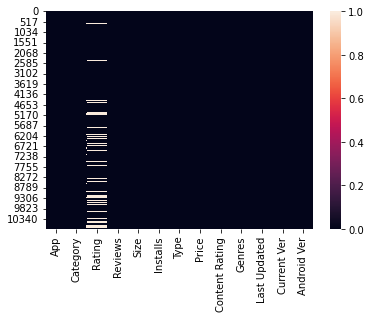

In [ ]:
sns.heatmap(googel_data.isnull())

In [ ]:
googel_data['Rating']=googel_data['Rating'].fillna(googel_data['Rating'].mean())

In [ ]:
googel_data = googel_data.dropna()

In [ ]:
googel_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
googel_data.shape

(10829, 13)

In [ ]:
(10841-10829)/10841*100

0.11069089567383084

**Duplicated rows**

In [ ]:
googel_data = googel_data.drop_duplicates()

In [ ]:
googel_data.shape

(10346, 13)

In [ ]:
googel_data[googel_data.App.str.contains("Subway Surfers")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3896,Subway Surfers,GAME,4.5,27711703,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


In [ ]:
(10841-10346)/10841*100

4.565999446545522

In [ ]:
googel_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5900,Cures A-Z,HEALTH_AND_FITNESS,4.0,265,4.1M,100000.0,Free,0.0,Everyone,Health & Fitness,"August 13, 2015",2.1,3.0 and up
9779,The NBC App - Watch Live TV and Full Episodes,FAMILY,4.1,58104,17M,5000000.0,Free,0.0,Teen,Entertainment,"July 5, 2018",4.18.1,4.1 and up
4793,Yandex Browser with Protect,PERSONALIZATION,4.5,1235841,Varies with device,50000000.0,Free,0.0,Everyone,Personalization,"July 18, 2018",Varies with device,Varies with device
3235,Google Translate,TOOLS,4.4,5745093,Varies with device,500000000.0,Free,0.0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device
3333,Speedtest by Ookla,TOOLS,4.4,1028794,Varies with device,100000000.0,Free,0.0,Everyone,Tools,"July 19, 2018",Varies with device,Varies with device


**EDA for datetime Colmun**

In [ ]:
googel_data['Last Updated']= pd.to_datetime(pd.Series(googel_data['Last Updated']))

In [ ]:
googel_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2110,Transformers Rescue Bots: Disaster Dash,FAMILY,4.4,19245,25M,1000000.0,Free,0.0,Everyone,Casual;Action & Adventure,2018-03-28,1.3,4.1 and up
4392,Shop 'n Save,SHOPPING,3.4,620,40M,100000.0,Free,0.0,Everyone,Shopping,2018-03-13,2.2.8,4.1 and up
10444,Signal Spy - Monitor Signal Strength & Data Usage,TOOLS,4.4,875,8.5M,100000.0,Free,0.0,Everyone,Tools,2017-12-31,1.9.9.5,5.1 and up
10779,Fortune Quest: Savior,FAMILY,3.6,135,75M,10000.0,Free,0.0,Everyone 10+,Role Playing,2018-06-01,1.022,4.4 and up
10423,Angry Shark 2016,FAMILY,4.0,73185,46M,5000000.0,Free,0.0,Teen,Simulation,2017-11-01,1.6,4.0 and up


In [ ]:
googel_data.loc[googel_data['Last Updated'] < '2016-01-01' ][['App','Current Ver']]

,App,Current Ver
58,Restart Navigator,1.0.1
144,Cool Reader,Varies with device
170,Flybook,1.0.3
185,URBANO V 02 instruction manual,1.1
209,Plugin:AOT v5.0,3.0.1.11 (Build 311)
...,...,...
10817,HTC Sense Input - FR,1.0.612928
10830,News Minecraft.fr,1.5
10832,FR Tides,6.0
10833,Chemin (fr),0.8


In [ ]:
googel_data.loc[(googel_data['Last Updated'] < '2016-01-01')&(googel_data.Type =='Paid') ][['App','Android Ver','Current Ver','Rating']].sort_values('Rating',ascending=False)

,App,Android Ver,Current Ver,Rating
7100,CA Speakers,3.0 and up,1.0,5.0
9056,Santa's Monster Shootout DX,2.2 and up,1.05,5.0
5966,BC MVA Fines,4.1 and up,1.0,5.0
2271,FHR 5-Tier 2.0,4.0 and up,1.0,5.0
7477,USMLE Step 2 CK Flashcards,2.2 and up,2.47,5.0
...,...,...,...,...
10041,Advanced EX for HYUNDAI,1.6 and up,1.10,2.7
2295,InfantRisk Center HCP,2.3.3 and up,1.3.4,2.6
5914,BA Pro Financial Calculator,2.3 and up,1.3.3,2.4
10043,Remote EX for NISSAN,3.0 and up,1.3,2.3


In [ ]:
googel_data.loc[(googel_data['Last Updated'] < '2016-01-01')&(googel_data.Type =='Paid') ].describe()

,Rating,Reviews,Installs,Price
count,171.000000,171.000000,171.000000,171.000000
mean,4.164134,5133.953216,33928.076023,5.366433
std,0.540324,28799.494744,126686.190907,15.965560
min,1.000000,0.000000,0.000000,0.990000
25%,4.100000,5.000000,100.000000,1.020000
50%,4.200000,56.000000,1000.000000,2.600000
75%,4.450000,675.500000,10000.000000,4.990000
max,5.000000,348962.000000,1000000.000000,200.000000


In [ ]:
googel_data.loc[googel_data['Last Updated'] > '2018-08-01'].Category.value_counts()

FAMILY                 111
GAME                    74
SHOPPING                60
TOOLS                   60
SOCIAL                  48
PRODUCTIVITY            45
SPORTS                  37
NEWS_AND_MAGAZINES      36
PHOTOGRAPHY             35
TRAVEL_AND_LOCAL        35
FINANCE                 32
COMMUNICATION           32
VIDEO_PLAYERS           30
BUSINESS                26
HEALTH_AND_FITNESS      25
DATING                  23
MAPS_AND_NAVIGATION     23
MEDICAL                 23
PERSONALIZATION         21
LIFESTYLE               19
WEATHER                 17
ENTERTAINMENT           15
FOOD_AND_DRINK          14
EDUCATION               10
HOUSE_AND_HOME           9
BOOKS_AND_REFERENCE      8
AUTO_AND_VEHICLES        8
PARENTING                7
ART_AND_DESIGN           4
COMICS                   4
EVENTS                   4
LIBRARIES_AND_DEMO       3
BEAUTY                   2
Name: Category, dtype: int64

### Storytelling - Visualization

In [ ]:
googel_data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

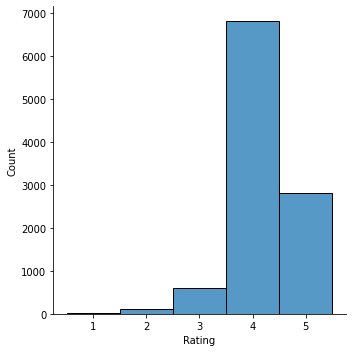

In [ ]:
sns.displot(googel_data,x='Rating',bins=10, discrete=True)

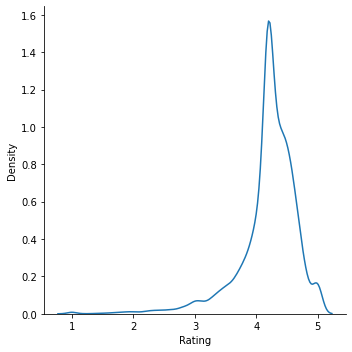

In [ ]:
sns.displot(googel_data,x='Rating',kind='kde')

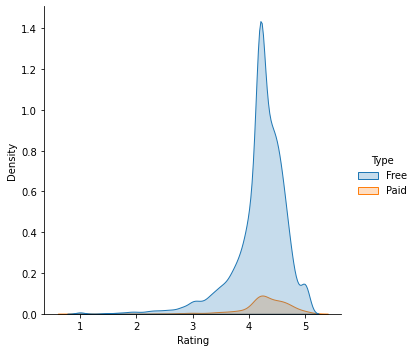

In [ ]:
sns.displot(googel_data,x='Rating',hue='Type',kind='kde', fill="True")

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Rating')]

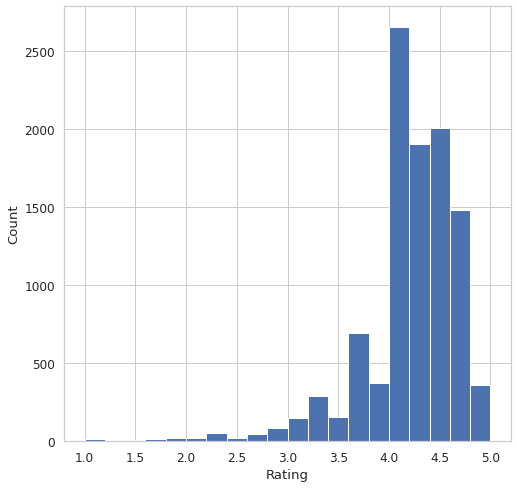

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]})
sns.distplot(
    googel_data['Rating'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Rating', ylabel='Count')

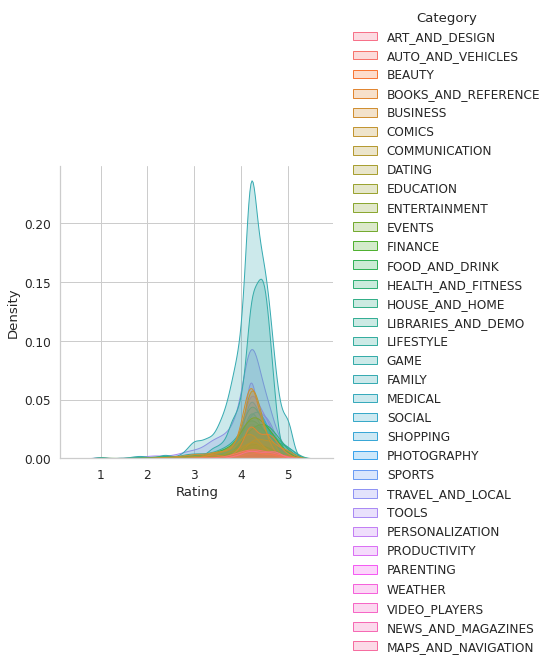

In [ ]:
sns.displot(googel_data,x='Rating',hue='Category',kind='kde', fill="True")

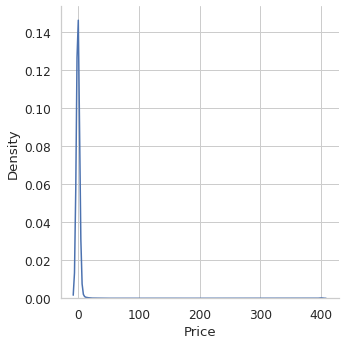

In [ ]:
sns.displot(googel_data,x='Price',kind='kde')

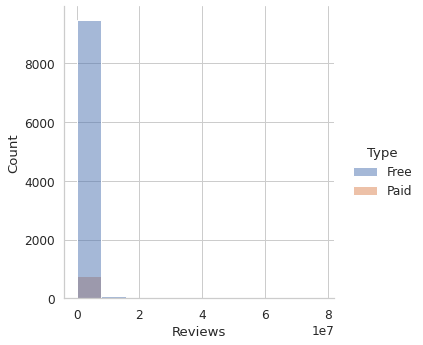

In [ ]:
sns.displot(googel_data,x='Reviews',bins=10,hue='Type')

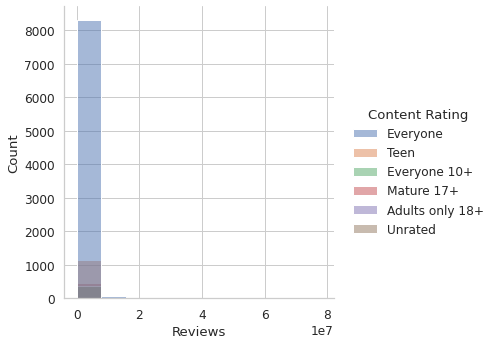

In [ ]:
sns.displot(googel_data,x='Reviews',bins=10,hue='Content Rating')

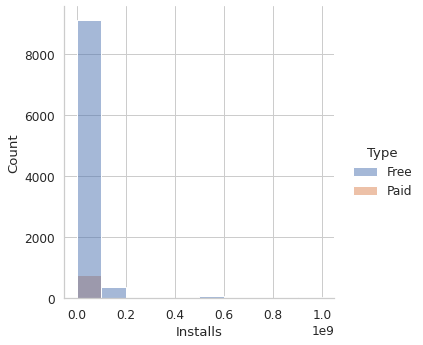

In [ ]:
sns.displot(googel_data,x='Installs',bins=10,hue='Type')

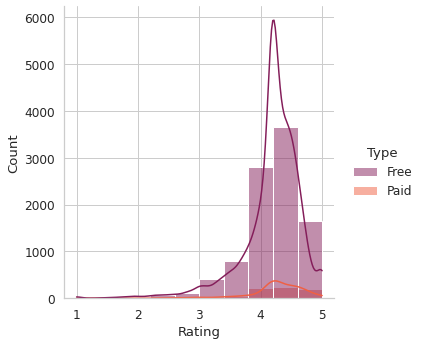

In [ ]:
sns.displot(x='Rating',kde=True,bins=10,data=googel_data,hue='Type', palette = 'rocket')

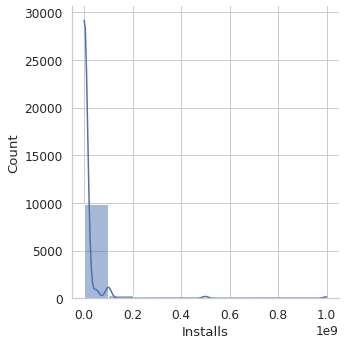

In [ ]:
sns.displot(x='Installs',kde=True,bins=10,data=googel_data)

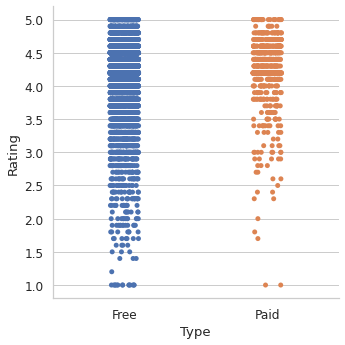

In [ ]:
sns.catplot(x="Type", y="Rating", data=googel_data)

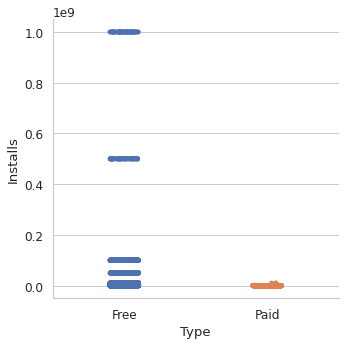

In [ ]:
sns.catplot(x="Type", y="Installs", data=googel_data)

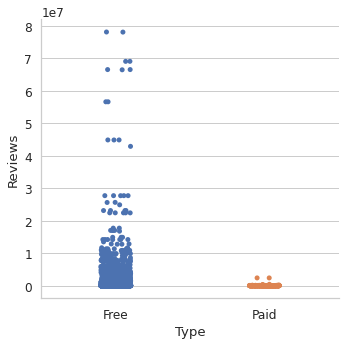

In [ ]:
sns.catplot(x="Type", y="Reviews", data=googel_data)

<Figure size 1080x576 with 0 Axes>

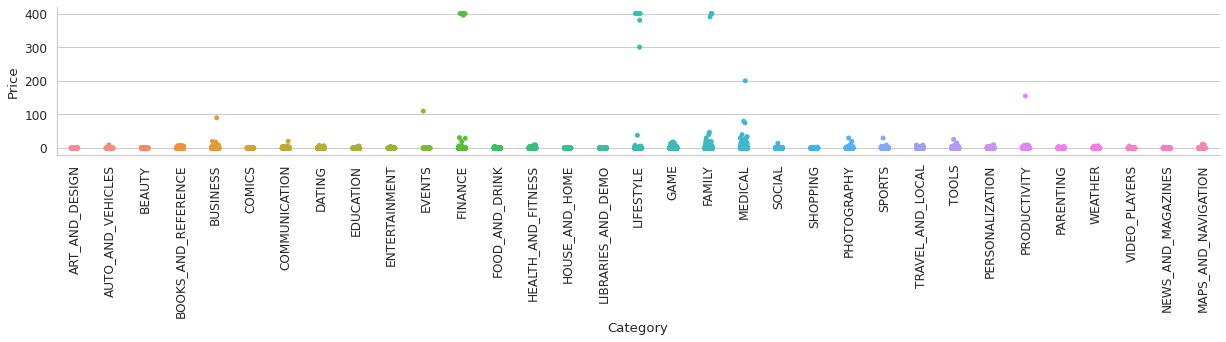

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.catplot(x="Category", y="Price", data=googel_data, height=3, aspect=6)
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))

<Figure size 1080x576 with 0 Axes>

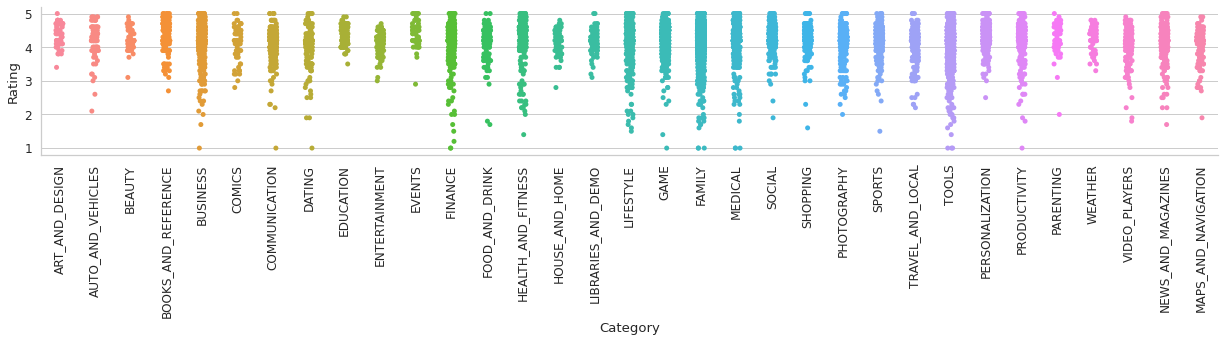

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.catplot(x="Category", y="Rating", data=googel_data, height=3, aspect=6)
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))

<Figure size 1080x576 with 0 Axes>

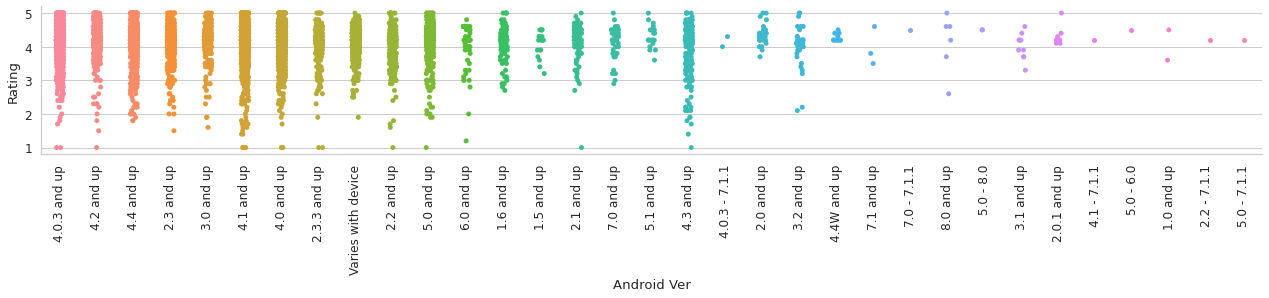

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.catplot(x="Android Ver", y="Rating", data=googel_data, height=3, aspect=6)
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

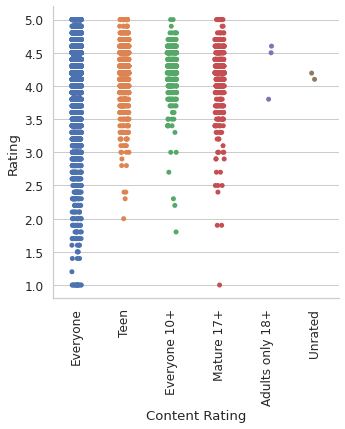

In [ ]:
sns.catplot(x="Content Rating", y='Rating',data=googel_data)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

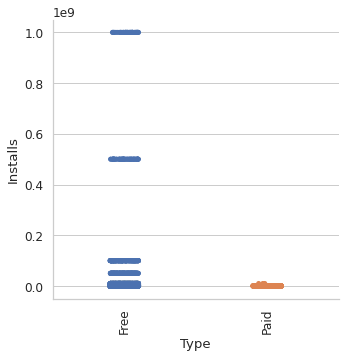

In [ ]:
sns.catplot(x="Type", y='Installs',data=googel_data)
plt.xticks(rotation=90)

<Figure size 1080x576 with 0 Axes>

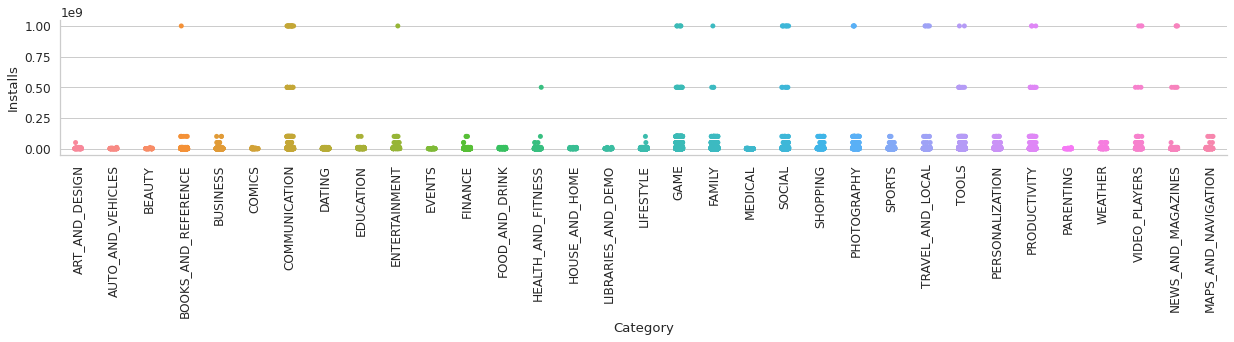

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.catplot(x="Category", y='Installs',data=googel_data,height=3, aspect=6)
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))

<Figure size 1080x576 with 0 Axes>

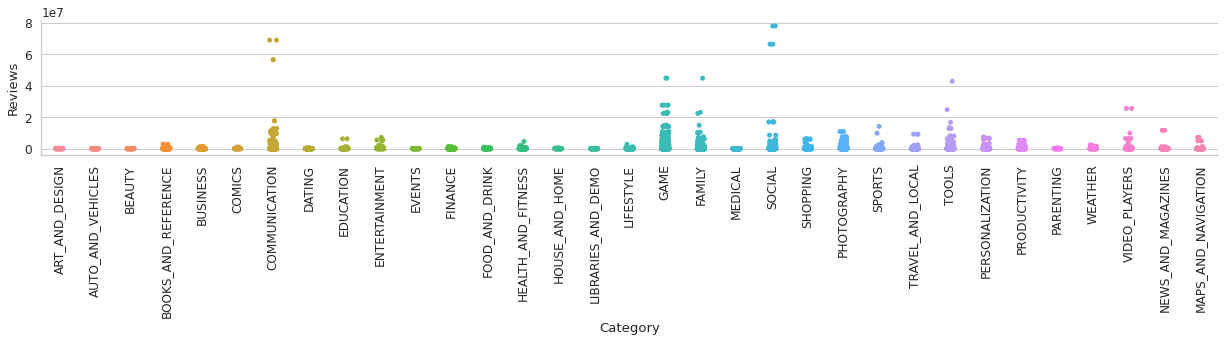

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.catplot(x="Category", y='Reviews',data=googel_data,height=3, aspect=6)
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))

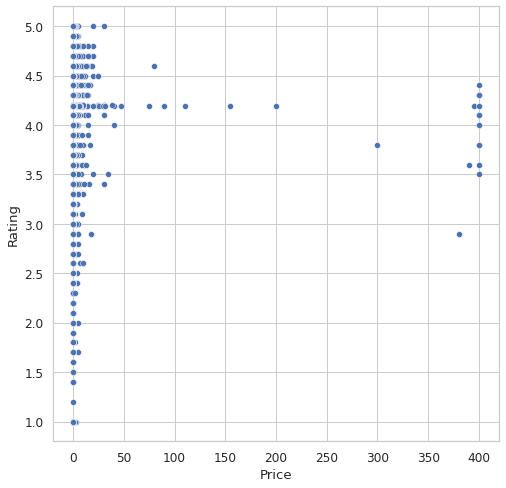

In [ ]:
sns.scatterplot(x='Price', y ='Rating' ,
data = googel_data)

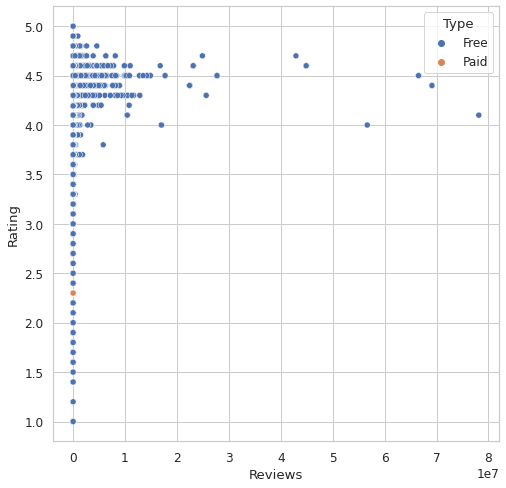

In [ ]:
sns.scatterplot(x='Reviews', y ='Rating' ,
data = googel_data,hue='Type')

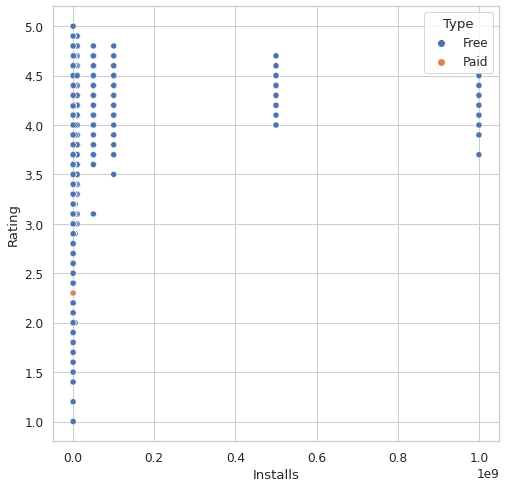

In [ ]:
sns.scatterplot(x='Installs', y ='Rating' ,
data = googel_data,hue='Type')

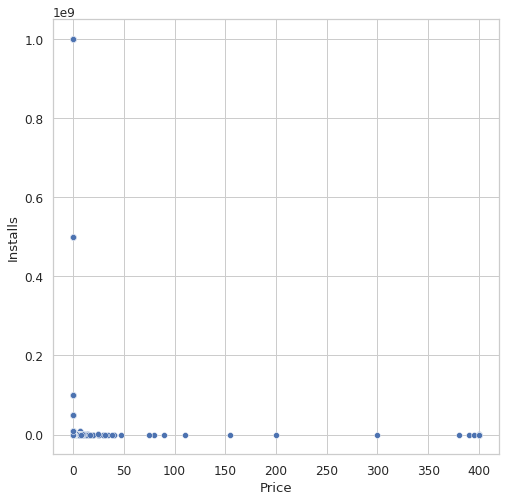

In [ ]:
sns.scatterplot(x='Price', y ='Installs' ,
data = googel_data)

<Figure size 1080x576 with 0 Axes>

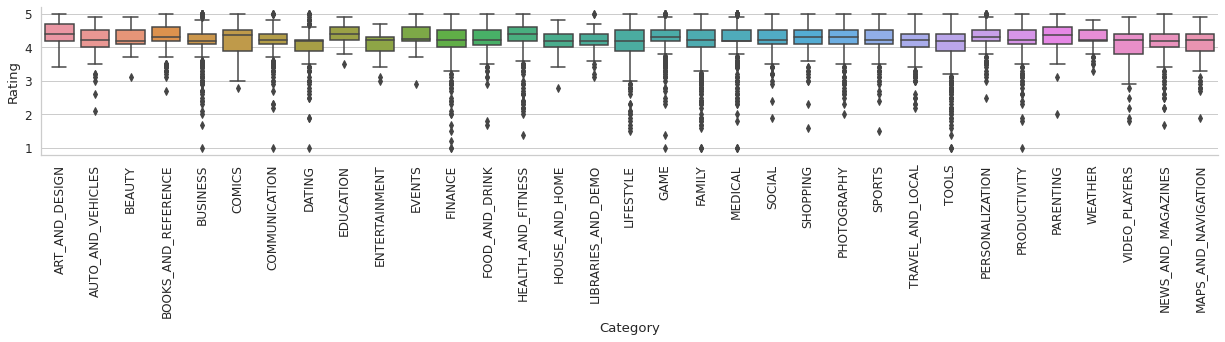

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.catplot(x="Category", y="Rating", kind="box", data=googel_data,height=3, aspect=6)
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))

<Figure size 1080x576 with 0 Axes>

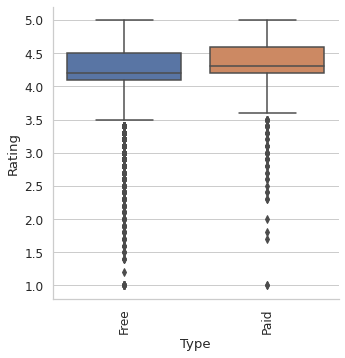

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.catplot(x="Type", y="Rating", kind="box", data=googel_data)
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))

<Figure size 1080x576 with 0 Axes>

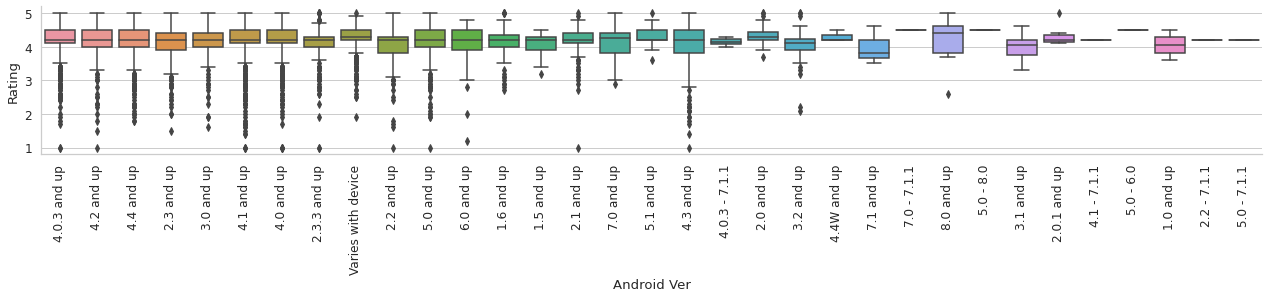

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.catplot(x="Android Ver", y="Rating", kind="box", data=googel_data,height=3, aspect=6)
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))

<Figure size 1080x576 with 0 Axes>

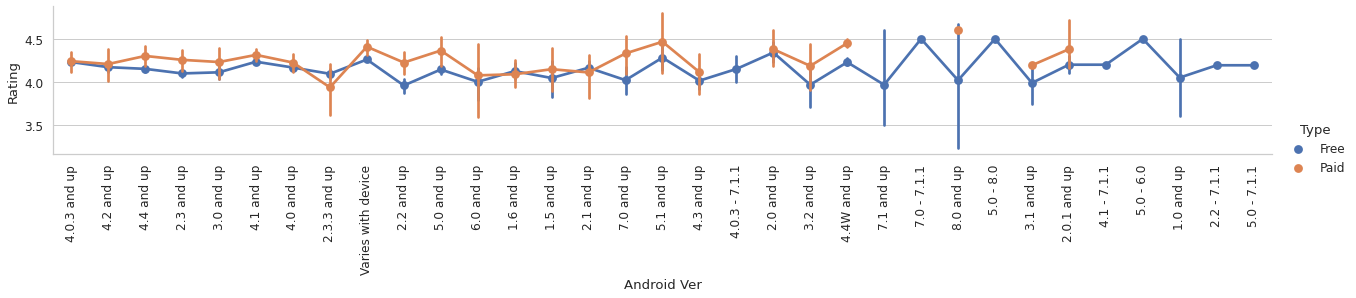

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.catplot(x="Android Ver", y="Rating", hue="Type", kind="point", data=googel_data,height=3, aspect=6)
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))

<Figure size 1080x576 with 0 Axes>

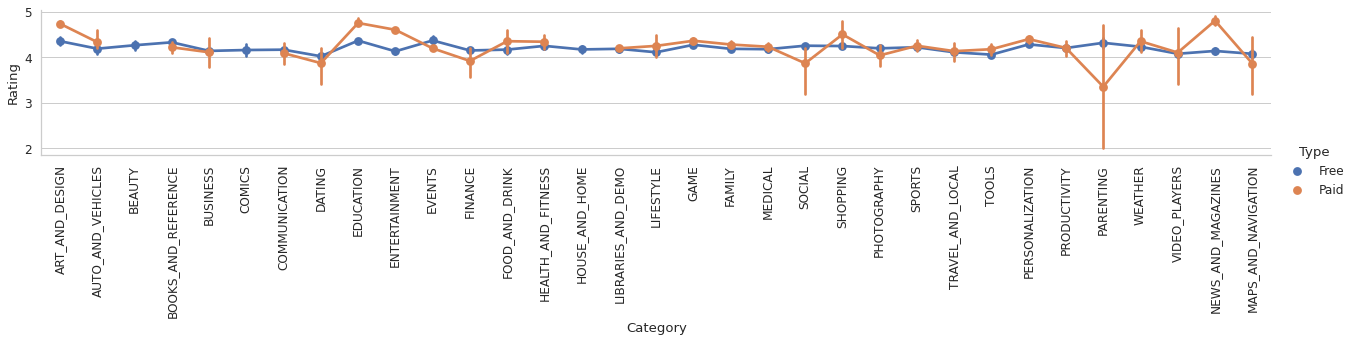

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.catplot(x="Category", y="Rating", hue="Type", kind="point", data=googel_data,height=3, aspect=6)
plt.xticks(rotation=90)
plt.figure(figsize = (15,8))

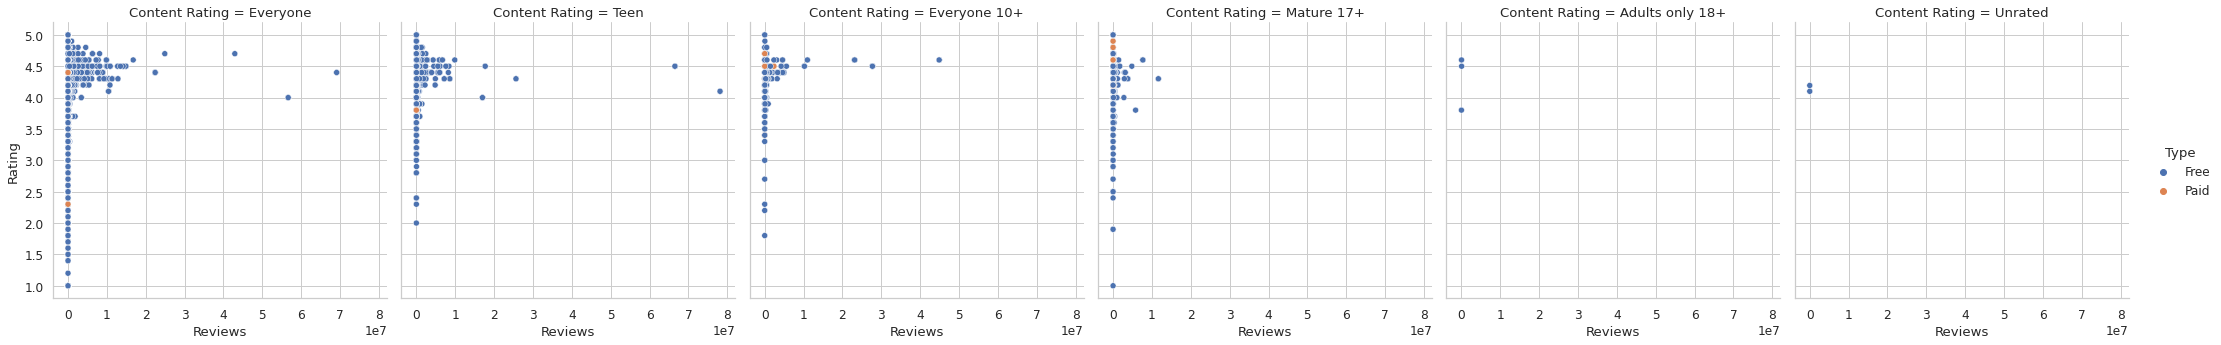

In [ ]:
sns.relplot(x="Reviews", y="Rating", hue="Type",col="Content Rating", data=googel_data)

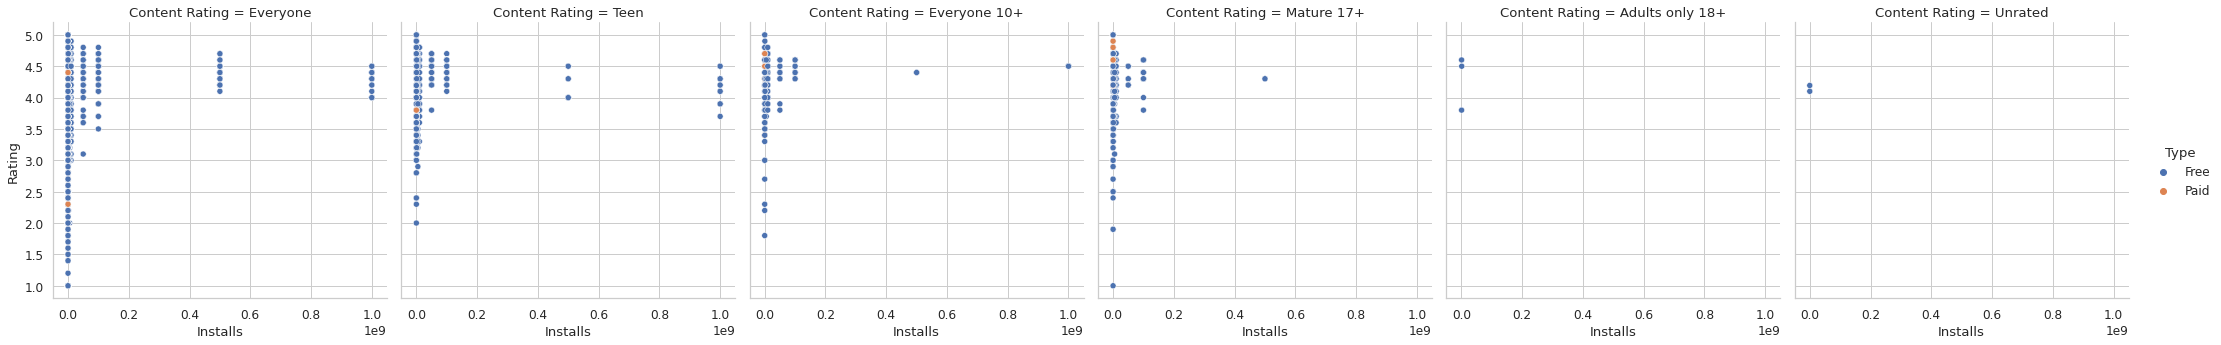

In [ ]:
sns.relplot(x="Installs", y="Rating", hue="Type",col="Content Rating", data=googel_data)